Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-2381705434.py:98: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels([f'{int(tick / 1000)}' for tick in ax2.get_yticks()])


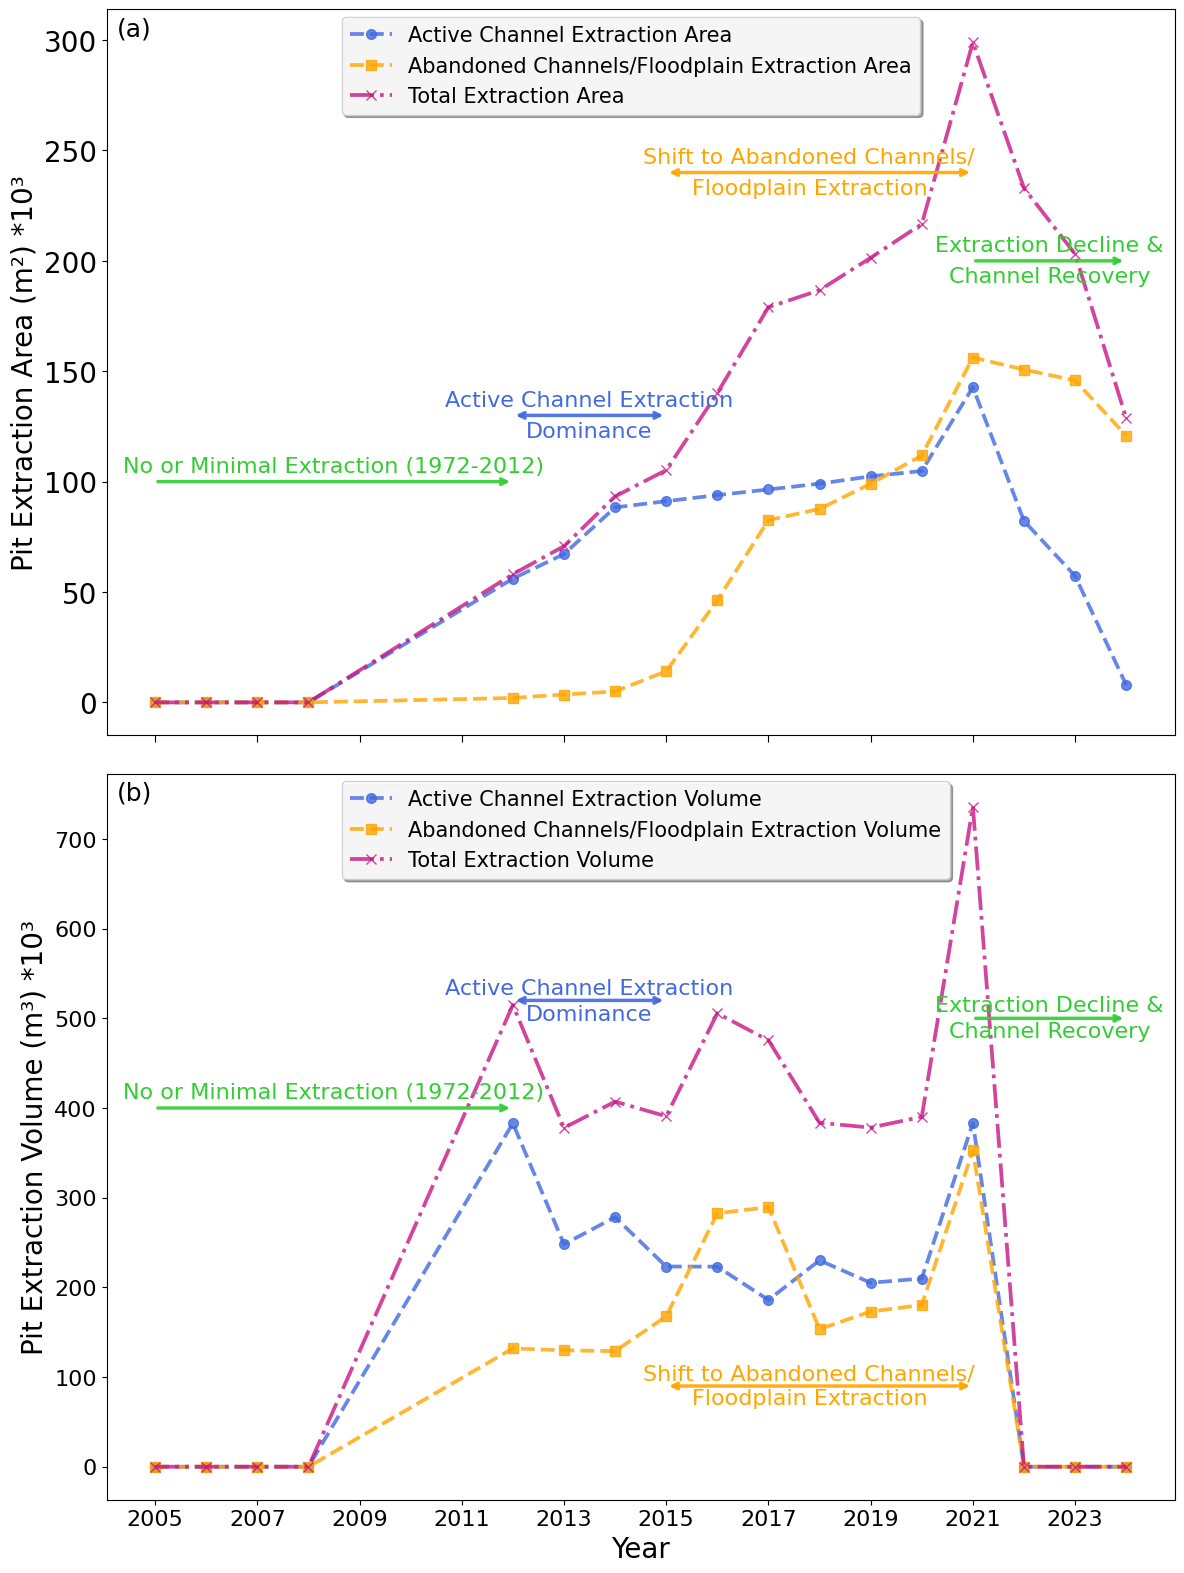

Combined plot saved successfully at /content/drive/MyDrive/colab/fig6_areavolume/fig6ab_areavolume.png


In [3]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Install necessary libraries
!pip install pandas matplotlib openpyxl

# Step 3: Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# ---------------- Load Data ---------------- #
# Load the Excel file for Area Plot
file_path_area = '/content/drive/MyDrive/colab/fig6_areavolume/fig6a_area/plot_area.xlsx'
df_area = pd.read_excel(file_path_area, sheet_name='values')  # Adjust the sheet name if necessary

# Load the Excel file for Volume Plot
file_path_volume = '/content/drive/MyDrive/colab/fig6_areavolume/fig6b_volume/plot_volume.xlsx'
df_volume = pd.read_excel(file_path_volume, sheet_name='Sheet1')  # Adjust the sheet name if necessary

# ---------------- Combined Plot ---------------- #
# Create a figure with two subplots (stacked vertically)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16), gridspec_kw={'height_ratios': [1, 1]})

# ---------------- Area Plot ---------------- #
# Plot data for area plot
ax1.plot(df_area['Year'], df_area['Area_C'], label='Active Channel Extraction Area', color='royalblue', linestyle='--', linewidth=2.7, marker='o', markersize=7, alpha=0.8)  # Changed linestyle to dashed
ax1.plot(df_area['Year'], df_area['Area_FP'], label='Abandoned Channels/Floodplain Extraction Area', color='orange', linestyle='--', linewidth=2.7, marker='s', markersize=7, alpha=0.8)
ax1.plot(df_area['Year'], df_area['Area_Total'], label='Total Extraction Area', color='mediumvioletred', linestyle='-.', linewidth=2.7, marker='x', markersize=7, alpha=0.8)


# Remove x-axis labels for the area plot but keep ticks
ax1.set_xticks(range(2005, 2025, 2))  # Set round year values as x-axis ticks
ax1.tick_params(axis='x', which='both', length=5, labelbottom=False)  # Keep ticks visible but hide labels
ax1.set_xlabel('')  # No x-axis label

from matplotlib.ticker import FuncFormatter

# Format y-axis labels to scale by 1000
def scale_y_axis(tick, pos):
    return f'{int(tick / 1000)}'

ax1.yaxis.set_major_formatter(FuncFormatter(scale_y_axis))

# Increase font sizes for axis labels and ticks
ax1.tick_params(axis='both', which='major', labelsize=20)  # Larger tick labels
ax1.set_ylabel(r'Pit Extraction Area (m²) *10³', fontsize=20)  # Larger y-axis label


# Add legend for the area plot
ax1.legend(loc=(0.22, 0.855), fontsize=15, shadow=True, fancybox=True, framealpha=0.9)

#Add arrows and annotations for the area plot
# Pre-Extraction (2005-2012)
ax1.annotate('', xy=(2005, 1e5), xytext=(2012, 1e5), arrowprops=dict(arrowstyle='<-', lw=2.5, color='limegreen', alpha=0.9))
ax1.annotate('No or Minimal Extraction (1972-2012)', xy=(2008.5, 1.07e5), fontsize=16, ha='center', va='center', color='limegreen')

# Channel Extraction Dominance (2012-2015)
ax1.annotate('', xy=(2012, 1.3e5), xytext=(2015, 1.3e5), arrowprops=dict(arrowstyle='<->', lw=2.5, color='royalblue', alpha=0.9))
ax1.annotate('Active Channel Extraction', xy=(2013.5, 1.37e5), fontsize=16, ha='center', va='center', color='royalblue')
ax1.annotate('Dominance', xy=(2013.5, 1.23e5), fontsize=16, ha='center', va='center', color='royalblue')

# Shift to Floodplain Extraction (2016-2021)
ax1.annotate('', xy=(2015, 2.4e5), xytext=(2021, 2.4e5), arrowprops=dict(arrowstyle='<->', lw=2.5, color='orange', alpha=0.9))
ax1.annotate('Shift to Abandoned Channels/', xy=(2017.8, 2.47e5), fontsize=16, ha='center', va='center', color='orange')
ax1.annotate('Floodplain Extraction', xy = (2017.8, 2.33e5), fontsize=16, ha='center', va='center', color='orange')

# Mining Ban & Recovery (2021-2024)
ax1.annotate('', xy=(2021, 2e5), xytext=(2024, 2e5), arrowprops=dict(arrowstyle='<-', lw=2.5, color='limegreen', alpha=0.9))
ax1.annotate('Extraction Decline &', xy=(2022.5, 2.07e5), fontsize=16, ha='center', va='center', color='limegreen')
ax1.annotate('Channel Recovery', xy=(2022.5, 1.93e5), fontsize=16, ha='center', va='center', color='limegreen')


# Add a text annotation (a) using axes coordinates
ax1.text(0.01, 0.99, '(a)', fontsize=18, color='black', transform=ax1.transAxes,
         verticalalignment='top', horizontalalignment='left')

# Apply gridlines consistent with the volume plot
#ax1.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# ---------------- Volume Plot ---------------- #
# Plot data for volume plot
ax2.plot(df_volume['year'], df_volume['vol_c (cum)'], label='Active Channel Extraction Volume', color='royalblue', linestyle='--', linewidth=2.7, marker='o', markersize=7, alpha=0.8)  # Changed linestyle to dashed
ax2.plot(df_volume['year'], df_volume['vol_fp (cum)'], label='Abandoned Channels/Floodplain Extraction Volume', color='orange', linestyle='--', linewidth=2.7, marker='s', markersize=7, alpha=0.8)
ax2.plot(df_volume['year'], df_volume['vol_total (cum)'], label='Total Extraction Volume', color='mediumvioletred', linestyle='-.', linewidth=2.7, marker='x', markersize=7, alpha=0.8)


# Customize the x-axis and y-axis labels for the volume plot
ax2.set_xlabel('Year', fontsize=20)
ax2.set_ylabel(r'Pit Extraction Volume (m³) *10³', fontsize=20)

# Customizing the x-axis tick labels to show round year values
ax2.set_xticks(range(2005, 2025, 2))  # Round year values
ax2.set_xticklabels([f'{year}' for year in range(2005, 2025, 2)])

# Customizing the y-axis tick labels to scale down by 1000
ax2.set_yticklabels([f'{int(tick / 1000)}' for tick in ax2.get_yticks()])

# Set font size for x and y axis tick labels
ax2.tick_params(axis='x', labelsize=16)  # Font size for x-axis tick labels
ax2.tick_params(axis='y', labelsize=16)  # Font size for y-axis tick labels


# Add legend for the volume plot
ax2.legend(loc=(0.22, 0.855), fontsize=15, shadow=True, fancybox=True, framealpha=0.9)

# -------- Volume plot annotations (matched to area plot) --------
# Pre-Extraction (2005–2012)
ax2.annotate('', xy=(2005, 4e5), xytext=(2012, 4e5),
             arrowprops=dict(arrowstyle='<-', lw=2.5, color='limegreen', alpha=0.9))
ax2.annotate('No or Minimal Extraction (1972-2012)',
             xy=(2008.5, 4.18e5), fontsize=16, ha='center', va='center', color='limegreen')

# Channel Extraction Dominance (2012–2015)
ax2.annotate('', xy=(2012, 520e3), xytext=(2015, 520e3),
             arrowprops=dict(arrowstyle='<->', lw=2.5, color='royalblue', alpha=0.9))
ax2.annotate('Active Channel Extraction',
             xy=(2013.5, 534e3), fontsize=16, ha='center', va='center', color='royalblue')
ax2.annotate('Dominance',
             xy=(2013.5, 504e3), fontsize=16, ha='center', va='center', color='royalblue')

# Shift to Floodplain Extraction (2016–2021)  [use ax2, mirror area plot text and x=2017.8]
ax2.annotate('', xy=(2015, 90e3), xytext=(2021, 90e3),
             arrowprops=dict(arrowstyle='<->', lw=2.5, color='orange', alpha=0.9))
ax2.annotate('Shift to Abandoned Channels/',
             xy=(2017.8, 104e3), fontsize=16, ha='center', va='center', color='orange')
ax2.annotate('Floodplain Extraction',
             xy=(2017.8, 76e3), fontsize=16, ha='center', va='center', color='orange')

# Mining Ban & Recovery (2021–2024)
ax2.annotate('', xy=(2021, 5e5), xytext=(2024, 5e5),
             arrowprops=dict(arrowstyle='<-', lw=2.5, color='limegreen', alpha=0.9))
ax2.annotate('Extraction Decline &',
             xy=(2022.5, 5.14e5), fontsize=16, ha='center', va='center', color='limegreen')
ax2.annotate('Channel Recovery',
             xy=(2022.5, 4.86e5), fontsize=16, ha='center', va='center', color='limegreen')



# Add a text annotation (b) using axes coordinates
ax2.text(0.01, 0.99, '(b)', fontsize=18, color='black', transform=ax2.transAxes,
         verticalalignment='top', horizontalalignment='left')

# Apply gridlines for the volume plot
#ax2.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# ---------------- Save and Show ---------------- #
# Increase padding around the plots
plt.tight_layout()

# Save the combined figure
output_path_combined = '/content/drive/MyDrive/colab/fig6_areavolume/fig6ab_areavolume.png'
plt.savefig(output_path_combined, dpi=1200, bbox_inches='tight')
plt.show()

print(f"Combined plot saved successfully at {output_path_combined}")


/tmp/ipython-input-3069101206.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)


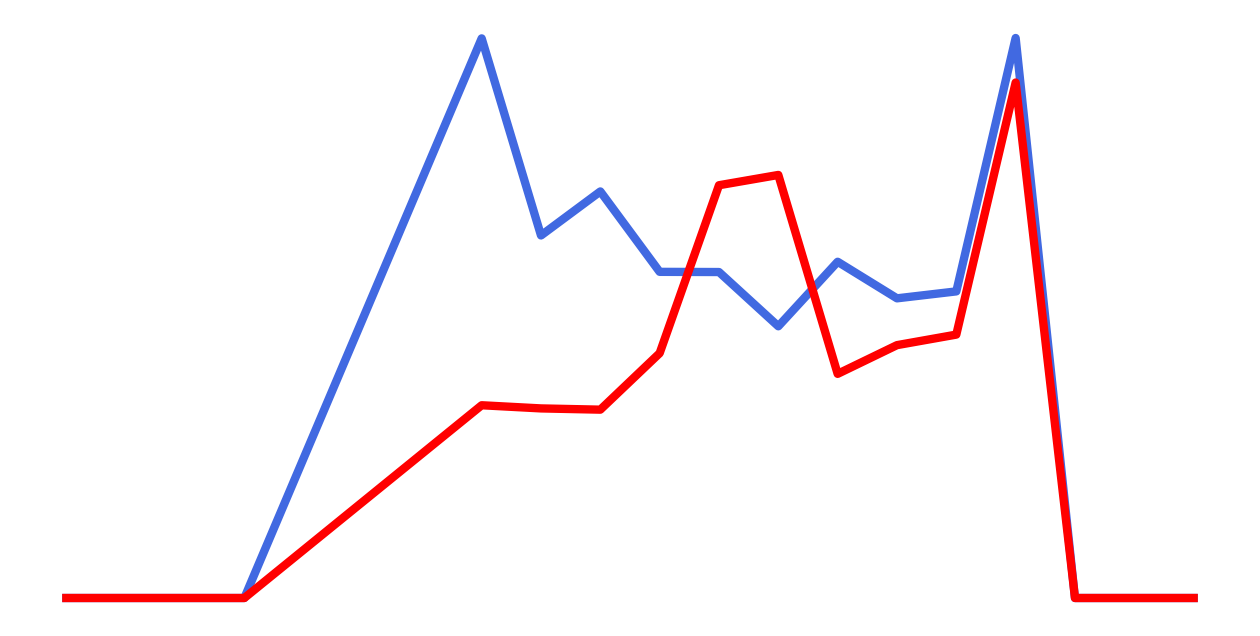

Simplified transparent plot with shaded background saved successfully at /content/drive/MyDrive/colab/fig6_areavolume/fig6_curves_transparent_shade.png


In [ ]:
# ---------------- Simplified Plot with Background Shade ---------------- #
import numpy as np

# Create a new figure with a wider aspect ratio
fig, ax = plt.subplots(figsize=(16, 8))  # Increase figure width for more spread along x-axis

# Compute the shaded region around each curve (2% wider than the curve width)
shade_factor = 0  # 20% wider
channel_upper = df_volume['vol_c (cum)'] + (df_volume['vol_c (cum)'] * shade_factor)
channel_lower = df_volume['vol_c (cum)'] - (df_volume['vol_c (cum)'] * shade_factor)
floodplain_upper = df_volume['vol_fp (cum)'] + (df_volume['vol_fp (cum)'] * shade_factor)
floodplain_lower = df_volume['vol_fp (cum)'] - (df_volume['vol_fp (cum)'] * shade_factor)

# Add shaded regions with a light white background
ax.fill_between(
    df_volume['year'], channel_lower, channel_upper,
    color='white', alpha=0.6  # Light white shade for the channel curve
)
ax.fill_between(
    df_volume['year'], floodplain_lower, floodplain_upper,
    color='white', alpha=0.6  # Light white shade for the floodplain curve
)

# Plot only the Channel and Floodplain curves without markers
ax.plot(
    df_volume['year'], df_volume['vol_c (cum)'],
    color='royalblue', linestyle='-', linewidth=6, alpha=1  # Channel curve
)
ax.plot(
    df_volume['year'], df_volume['vol_fp (cum)'],
    color='red', linestyle='-', linewidth=6, alpha=1  # Floodplain curve
)

# Remove x and y-axis labels
ax.set_xlabel('')
ax.set_ylabel('')

# Remove ticks and tick labels from both axes
ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

# Remove legend
ax.legend().set_visible(False)

# Remove gridlines
ax.grid(False)

# Set the figure and axes background to transparent
fig.patch.set_alpha(0)  # Make the figure background transparent
ax.patch.set_alpha(0)   # Make the axes background transparent

# Remove axes borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Save the simplified figure with a transparent background
output_path_transparent_curves_shade = '/content/drive/MyDrive/colab/fig6_areavolume/fig6_curves_transparent_shade.png'
plt.savefig(output_path_transparent_curves_shade, dpi=600, bbox_inches='tight', transparent=True)
plt.show()

print(f"Simplified transparent plot with shaded background saved successfully at {output_path_transparent_curves_shade}")


/tmp/ipython-input-4036283812.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)


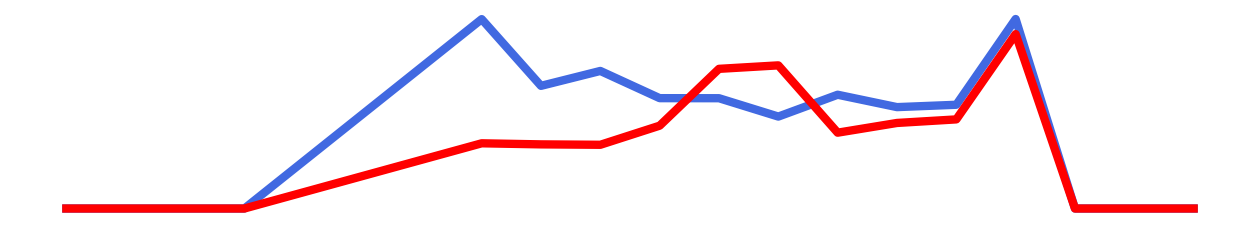

Simplified plot with custom aspect ratio saved successfully at /content/drive/MyDrive/colab/fig6_areavolume/fig6_curves_custom_size.png


In [ ]:
# ---------------- Simplified Plot with Custom Aspect Ratio ---------------- #
import numpy as np
import matplotlib.pyplot as plt

# Define the horizontal width (in inches)
horizontal_width = 16  # You can adjust this as needed

# Calculate the vertical height as 16.92% of the horizontal width
vertical_height = 0.1692 * horizontal_width

# Create a new figure with the calculated aspect ratio
fig, ax = plt.subplots(figsize=(horizontal_width, vertical_height))

# Plot only the Channel and Floodplain curves without markers
ax.plot(
    df_volume['year'], df_volume['vol_c (cum)'],
    color='royalblue', linestyle='-', linewidth=6, alpha=1  # Channel curve
)
ax.plot(
    df_volume['year'], df_volume['vol_fp (cum)'],
    color='red', linestyle='-', linewidth=6, alpha=1  # Floodplain curve
)

# Remove x and y-axis labels
ax.set_xlabel('')
ax.set_ylabel('')

# Remove ticks and tick labels from both axes
ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

# Remove legend
ax.legend().set_visible(False)

# Remove gridlines
ax.grid(False)

# Set the figure and axes background to transparent
fig.patch.set_alpha(0)  # Make the figure background transparent
ax.patch.set_alpha(0)   # Make the axes background transparent

# Remove axes borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Save the simplified figure with a transparent background
output_path_custom_size = '/content/drive/MyDrive/colab/fig6_areavolume/fig6_curves_custom_size.png'
plt.savefig(output_path_custom_size, dpi=600, bbox_inches='tight', transparent=True)
plt.show()

print(f"Simplified plot with custom aspect ratio saved successfully at {output_path_custom_size}")
